<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Part_2/01_Perceptron/01_Perceptron_mnl.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  The perceptron model              #
###############################################

In [ ]:
# Libraries
import numpy as np                       # Numerical array operations
import matplotlib.pyplot as plt          # Data plotting/visualization

In [ ]:
# Dataset
X = np.array([[1, 1, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1]]).T  # Inputs
y_and = np.array([0, 0, 0, 1])                              # AND gate
y_or = np.array([0, 1, 1, 1])                               # OR gate
y_xor = np.array([0, 1, 1, 0])                              # XOR gate

In [ ]:
# Check feature and targets shapes
print(f'Features shape: {X.shape}')
print(f'y_and shape:    {y_and.shape}')
print(f'y_or shape:     {y_or.shape}')
print(f'y_xor shape:    {y_xor.shape}')

Features shape: (4, 3)
y_and shape:    (4,)
y_or shape:     (4,)
y_xor shape:    (4,)


Perceptron algorithm:

$$
\begin{align*}
& \textbf{input:} \quad X = \{(\mathbf{x}_i, y_i)|i=1, \dots, n\}, \eta, \varepsilon \\
\\
1: \quad & \mathbf{w} \leftarrow \mathbf{0} \\
2: \quad & \mathbf{g} \leftarrow \mathbf{1} \quad \textit{// Initialize gradient to enter loop} \\
3: \quad & \textbf{while } \mathbf{g} \cdot \mathbf{g} > \varepsilon \textbf{ do} \\
4: \quad & \qquad \mathbf{g} \leftarrow -\frac{1}{n}\sum_{i=1}^{n}(y_i - \mathbf{x}_i\mathbf{w}^T)\mathbf{x}_i \\
5: \quad & \qquad \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \mathbf{g} \\
\\
& \textbf{return:} \quad \mathbf{w}
\end{align*}
$$

In [ ]:
# Perceptron algorithm
def learn_perceptron(X, y, eta, eps):
    d = X.shape[1]
    w = np.zeros(d)
    g = np.ones(d)

    while np.dot(g, g) > eps:
        g = -np.mean((y - X @ w)[:, np.newaxis] * X, axis=0)  # Compute gradient
        w = w - eta * g                                       # Update weights

    return w

The derivative of the MSE with respect to **w** is:

$$ \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - \mathbf{x}_i\mathbf{w}^T) \mathbf{x}_i. $$

In [ ]:
# Training Perceptrons
w_and = learn_perceptron(X, y_and, 0.5, 1e-10)
w_or = learn_perceptron(X, y_or, 0.5, 1e-10)
w_xor = learn_perceptron(X, y_xor, 0.5, 1e-10)

In [ ]:
# Perceptron weights
print(f'AND weights: w0={w_and[0]:.2f}, w1={w_and[1]:.2f},  w2={w_and[2]:.2f}')
print(f'OR weights:  w0={w_or[0]:.2f},  w1={w_or[1]:.2f},  w2={w_or[2]:.2f}')
print(f'XOR weights: w0={w_xor[0]:.2f},  w1={w_xor[1]:.2f},  w2={w_xor[2]:.2f}')

AND weights: w0=-0.25, w1=0.50,  w2=0.50
OR weights:  w0=0.25,  w1=0.50,  w2=0.50
XOR weights: w0=0.50,  w1=0.00,  w2=0.00


In [ ]:
# Meshgrid
s = 500
X1, X2 = np.meshgrid(np.linspace(-0.1, 1.1, s), np.linspace(-0.1, 1.1, s))
Xt = np.c_[np.ones(s * s), X1.ravel(), X2.ravel()]

The neuron's output is

$$ y = \varphi \left( w_0 + \sum_{i=1}^{d} w_i x_i \right), \quad \text{where} \quad \varphi(u) = \begin{cases} 1 & \text{if } u \ge 0.5, \\ 0 & \text{otherwise.} \end{cases} $$

In [ ]:
# Decision boundaries
Y1 = (Xt @ w_and >= 0.5).reshape(s, s)    # And
Y2 = (Xt @ w_or >= 0.5).reshape(s, s)     # Or
Y3 = (Xt @ w_xor >= 0.5).reshape(s, s)    # Xor

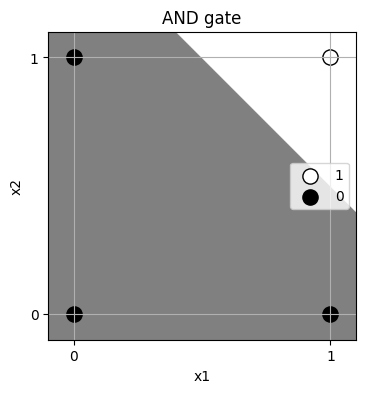

In [ ]:
# And gate decision boundary
plt.figure(figsize=(6, 4))
plt.imshow(Y1, extent=(-0.1, 1.1, -0.1, 1.1), origin='lower', cmap='gray', alpha=0.5)
plt.scatter(X[y_and == 1, 1], X[y_and == 1, 2], edgecolor='k', facecolor='w', s=120, label='1')
plt.scatter(X[y_and == 0, 1], X[y_and == 0, 2], edgecolor='k', facecolor='k', s=120, label='0')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('AND gate')
plt.legend(loc='center right')
plt.show()

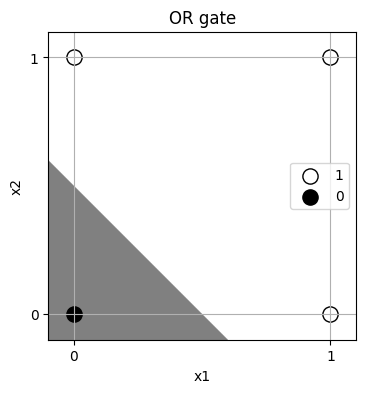

In [ ]:
# Or gate decision boundary
plt.figure(figsize=(6, 4))
plt.imshow(Y2, extent=(-0.1, 1.1, -0.1, 1.1), origin='lower', cmap='gray', alpha=0.5)
plt.scatter(X[y_or == 1, 1], X[y_or == 1, 2], edgecolor='k', facecolor='w', s=120, label='1')
plt.scatter(X[y_or == 0, 1], X[y_or == 0, 2], edgecolor='k', facecolor='k', s=120, label='0')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('OR gate')
plt.legend(loc='center right')
plt.show()

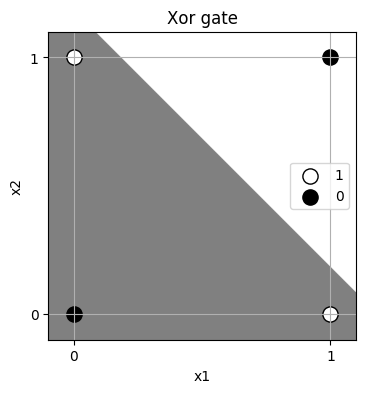

In [ ]:
# X0r gate decision boundary
plt.figure(figsize=(6, 4))
plt.imshow(Y3, extent=(-0.1, 1.1, -0.1, 1.1), origin='lower', cmap='gray', alpha=0.5)
plt.scatter(X[y_xor == 1, 1], X[y_xor == 1, 2], edgecolor='k', facecolor='w', s=120, label='1')
plt.scatter(X[y_xor == 0, 1], X[y_xor == 0, 2], edgecolor='k', facecolor='k', s=120, label='0')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Xor gate')
plt.legend(loc='center right')
plt.show()